#Examen 2
Lesly Andrea Suárez Sánchez 177953

##Topic for final project: Sentiment analysis for tourists comments in Puebla

##Exercise 1: Optimization

Gradient Descent result after 20 iterations: -1.9567654435772432


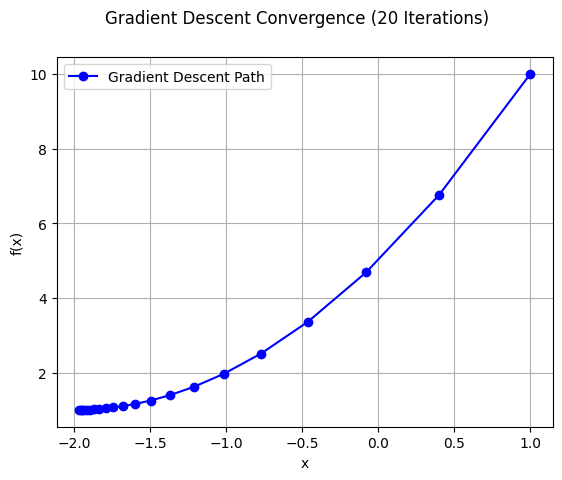

In [ ]:
## Método de Gradiente Descent

import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learning_rate, n, tol=1e-6):
    """
    Perform Gradient Descent to minimize a function.

    Parameters:
        gradient (function): The gradient function of the objective function.
        start (float): The initial point to start the optimization.
        learning_rate (float): The step size for each iteration.
        n_iter (int): The maximum number of iterations.
        tol (float): The tolerance for stopping criteria.

    Returns:
        list: The history of x values obtained in each iteration.
    """
    x = start
    x_history = [x]  # Store values for visualization
    for _ in range(n):
        grad = gradient(x) # we get the gradient of x
        if np.abs(grad) < tol: #if the gradient is less than our tolerance we break
            break
        x = x - learning_rate * grad
        x_history.append(x)  # Store updated x values
    #get last value
    result = x_history[n-1]
    return result, x_history #returns all x itertions and the result of last iteration

def plot_results(x_history, f, fig_title):
    """
    Plots the function values obtained in each iteration.

    Parameters:
        x_history (list): The x values obtained from gradient descent.
        f (function): The function being minimized.
        fig_title (str): Title of the figure.
    """
    fig = plt.figure()
    fig.suptitle(fig_title, fontsize=12)

    # Evaluate function values for each x in the history
    y_values = [f(xi) for xi in x_history]

    # Plot the points along the descent path
    plt.plot(x_history, y_values, 'bo-', label='Gradient Descent Path')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return

### Example ###

# Define the objective function and its gradient
def f(x):
    return x**2 + 4*x + 5  # Example function: f(x) = x^2 + 4x + 5

def grad_f(x):
    return 2 * x + 4  # Gradient of f(x): f'(x) = 2x + 4

# Run Gradient Descent
start = 1.0  # Initial point

# Perform Gradient Descent
result, x_history = gradient_descent(grad_f, start, learning_rate=0.1, n=20)

print("Gradient Descent result after 20 iterations:", result)

# Plot the results
plot_results(x_history, f, "Gradient Descent Convergence (20 Iterations)")


##Exercise 2:  knowledge-based system

The system must take as input a set of facts and logical rules to determine whether the defendant is guilty or innocent.

You will then extend the system to allow for an appeal, where new evidence can be added and the system updates its verdict.

You will need to explain in a comment or accompanying document what formalism
you used to address the problem (e.g. propositional logic, first-order logic, production rules, etc.) and why you chose it.

### System used: Rule Based System (propositional logic reasoning)

In [ ]:
class RuleBasedLegalSystem:
    def __init__(self):
        # Initialize facts and rules
        self.facts = set()  # Empty set for facts
        self.rules = []  # Empty list for rules

    def add_fact(self, fact):
        """ Add a fact to the system. """
        self.facts.add(fact)
        print(f"Added fact: {fact}")  # Just to check my program is working

    def add_rule(self, prereq, assumption, conclusion):
        """
        Add a logical rule: (prerequisite, assumption, conclusion).
        - prereq: A fact that must be true for the rule to apply.
        - assumption: A fact that must be true for the rule to apply.
        - conclusion: The verdict if the rule applies ("guilty" or "innocent").
        """
        self.rules.append((prereq, assumption, conclusion))
        print(f"Added rule: If {prereq} and {assumption} then {conclusion}.")  # Again just to check

    def evaluate(self):
        """
        Evaluate the case using the available facts and rules.
        Returns the verdict ("Guilty", "Innocent", or "Cannot determine").
        """
        verdict = "Cannot determine"  # Default verdict. In case we don't have the facts that align with rules

        for prereq, assumption, conclusion in self.rules:
            # Check if the prerequisite is in the facts and the assumption is in the facts
            if prereq in self.facts and assumption in self.facts:
                if conclusion == "guilty":
                    verdict = "Guilty"  # Based on rules
                elif conclusion == "innocent":
                    verdict = "Innocent"  # Based on rules
                # Do not break; continue evaluating all rules to ensure the most specific rule is applied

        return verdict

    def appeal(self, new_fact):
        """
        Appeal function to add new evidence and update the verdict.
        """
        print("\nAppeal in progress...")
        self.add_fact(new_fact)
        return self.evaluate()

###CASE 1: The Mansion Murder
Crime Description:

Crime: Murder of the owner of a mansion.

Accused: The butler.

**Reason for Guilt:**

o The butler was seen near the crime scene.

o A knife with his fingerprints was found.

o The butler had a debt with the victim.

Initial Verdict: Guilty.

**Appeal:**

New Evidence:

o A security video shows the butler was in another room at the time of the crime.

o The fingerprints on the knife do not match the butler’s.

Expected Result: Innocent.

###Case 1: Murder Case

In [ ]:
### Case 1: Murder case ###
legal_system = RuleBasedLegalSystem()

# Add initial facts
print("Initial facts:")
legal_system.add_fact("seen_near_crime_scene")  # Butler was seen near the crime scene
legal_system.add_fact("fingerprints_on_weapon")  # Knife with his fingerprints was found
legal_system.add_fact("motive")  # Butler had a debt with the victim

# Add rules
print("\nAdding rules:")
legal_system.add_rule("seen_near_crime_scene", "fingerprints_on_weapon", "guilty")  # If seen near crime scene and fingerprints on gun, guilty
legal_system.add_rule("seen_near_crime_scene", "motive", "guilty")  # If seen near crime scene and motive, guilty
legal_system.add_rule("fingerprints_on_weapon", "motive", "guilty")  # fingerprints on gun and motive, guilty
legal_system.add_rule("alibi", "no_fingerprints", "innocent")  # If alibi and no fingerprints on gun, innocent

# Evaluate initial verdict
print("\nEvaluating initial verdict...")
initial_verdict = legal_system.evaluate() #output: guilty
print(f"Initial verdict: {initial_verdict}")

# Appeal: New evidence is introduced (butler has an alibi)
print("\nNew evidence introduced during appeal: Butler has a verifiable alibi.")
partial_verdict = legal_system.appeal("alibi") #output: guilty
print(f"Updated verdict after appeal: {partial_verdict}")

#Appeal: New New evidence is introduced (butler's fingerprints aren't on the weapon)
print("\nNew evidence introduced during appeal: Butler's fingerprints do not match the weapon.")
final_verdict = legal_system.appeal("no_fingerprints") #output: innocent
print(f"Final verdict after appeal: {final_verdict}")

Initial facts:
Added fact: seen_near_crime_scene
Added fact: fingerprints_on_weapon
Added fact: motive

Adding rules:
Added rule: If seen_near_crime_scene and fingerprints_on_weapon then guilty.
Added rule: If seen_near_crime_scene and motive then guilty.
Added rule: If fingerprints_on_weapon and motive then guilty.
Added rule: If alibi and no_fingerprints then innocent.

Evaluating initial verdict...
Initial verdict: Guilty

New evidence introduced during appeal: Butler has a verifiable alibi.

Appeal in progress...
Added fact: alibi
Updated verdict after appeal: Guilty

New evidence introduced during appeal: Butler's fingerprints do not match the weapon.

Appeal in progress...
Added fact: no_fingerprints
Final verdict after appeal: Innocent


###Case 2: Bank Heist

In [ ]:
### Case 1: The Bank Heist ###
legal_system = RuleBasedLegalSystem()

# Add initial facts
print("Initial facts:")
legal_system.add_fact("had_blueprints")  # The accused was recently fired and had access to the bank’s blueprints
legal_system.add_fact("seen_near_crime")  # A witness saw him near the bank on the day of the robbery.
legal_system.add_fact("has_stolen_money")  # Stolen money was found in his house.

# Add rules
print("\nAdding rules:")
legal_system.add_rule("had_blueprints", "seen_near_crime", "guilty")  # If the blueprints were had and seen near the bank, guilty
legal_system.add_rule("had_blueprints", "has_stolen_money", "guilty")  # If the blueprints were had stolen money, guilty
legal_system.add_rule("seen_near_crime", "has_stolen_money", "guilty")  # seen near the crime and had stolen money, guilty
legal_system.add_rule("alibi", "not_money", "innocent")  # If alibi and not the bank robery money, innocent

# Evaluate initial verdict
print("\nEvaluating initial verdict...")
initial_verdict = legal_system.evaluate() #output: guilty
print(f"Initial verdict: {initial_verdict}")

# Appeal: New evidence is introduced (Witness is blind and not sure the saw the former bank employee near the crime)
print("\nNew evidence introduced during appeal: Witness is not sure what they saw.")
partial_verdict = legal_system.appeal("alibi") #output: guilty
print(f"Updated verdict after appeal: {partial_verdict}")

#Appeal: New New evidence is introduced (The oney found at his house came from an inheritance (sus))
print("\nNew evidence introduced during appeal: The money found was from inheritance")
final_verdict = legal_system.appeal("not_money") #output: innocent
print(f"Final verdict after appeal: {final_verdict}")

Initial facts:
Added fact: had_blueprints
Added fact: seen_near_crime
Added fact: has_stolen_money

Adding rules:
Added rule: If had_blueprints and seen_near_crime then guilty.
Added rule: If had_blueprints and has_stolen_money then guilty.
Added rule: If seen_near_crime and has_stolen_money then guilty.
Added rule: If alibi and not_money then innocent.

Evaluating initial verdict...
Initial verdict: Guilty

New evidence introduced during appeal: Witness is not sure what they saw.

Appeal in progress...
Added fact: alibi
Updated verdict after appeal: Guilty

New evidence introduced during appeal: The money found was from inheritance

Appeal in progress...
Added fact: not_money
Final verdict after appeal: Innocent


###Case 3: The Traffic Accident

In [ ]:
### Case 1: The Traffic Accident ###
legal_system = RuleBasedLegalSystem()

# Add initial facts
print("Initial facts:")
legal_system.add_fact("speeding")  # The driver was speeding.
legal_system.add_fact("ran_red_light")  # A witness claims the driver ran a red light.
legal_system.add_fact("drunk_driving")  # The driver had alcohol in their blood.

# Add rules
print("\nAdding rules:")
legal_system.add_rule("speeding", "ran_red_light", "guilty")  # If the driver was speeding and allegedly ran a red light, guilty
legal_system.add_rule("speeding", "drunk_driving", "guilty")  # If the driver was speeding and had alcohol in their blood, guilty
legal_system.add_rule("ran_red_light", "drunk_driving", "guilty")  # allegedly ran a red light and had alcohol in their blood, guilty
legal_system.add_rule("not_red_light", "legal_drunk", "innocent")
# If the light was actually green and The driver’s blood alcohol level was within the legal limit, innocent

# Evaluate initial verdict
print("\nEvaluating initial verdict...")
initial_verdict = legal_system.evaluate() #output: guilty
print(f"Initial verdict: {initial_verdict}")

# Appeal: New evidence is introduced (Witness is blind and not sure the saw the former bank employee near the crime)
print("\nNew evidence introduced during appeal: Cameras say the light was green")
partial_verdict = legal_system.appeal("not_red_light") #output: guilty
print(f"Updated verdict after appeal: {partial_verdict}")

#Appeal: New New evidence is introduced (The driver’s blood alcohol level was within the legal limit)
print("\nNew evidence introduced during appeal: The driver’s blood alcohol level was within the legal limit")
final_verdict = legal_system.appeal("legal_drunk") #output: innocent
print(f"Final verdict after appeal: {final_verdict}")

Initial facts:
Added fact: speeding
Added fact: ran_red_light
Added fact: drunk_driving

Adding rules:
Added rule: If speeding and ran_red_light then guilty.
Added rule: If speeding and drunk_driving then guilty.
Added rule: If ran_red_light and drunk_driving then guilty.
Added rule: If not_red_light and legal_drunk then innocent.

Evaluating initial verdict...
Initial verdict: Guilty

New evidence introduced during appeal: Cameras say the light was green

Appeal in progress...
Added fact: not_red_light
Updated verdict after appeal: Guilty

New evidence introduced during appeal: The driver’s blood alcohol level was within the legal limit

Appeal in progress...
Added fact: legal_drunk
Final verdict after appeal: Innocent


##Exercise 3 : Emotion Detection in Text
Problem Description:

Develop a system that detects and classifies emotions in text messages using Bayesian techniques. This can be useful for applications such as sentiment analysis in social media or customer support.

In [ ]:
!pip install pgmpy

In [ ]:
import re
from collections import defaultdict
import math
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
# Download stopwords if not already downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

In [ ]:
#Class to predict the emotion of a text
class EmotionAnalyzer:
    def __init__(self):
        # Prior probabilities P(E)
        self.prior_probabilities = {
            'happy': 0.4,
            'sad': 0.3,
            'angry': 0.3
        }

        # Word probabilities P(W|E)
        self.word_probabilities = {
            'happy': {'happy': 0.25, 'joyful': 0.125, 'great': 0.125, 'sad': 0.05, 'down': 0.03, 'angry': 0.02, 'mad': 0.01, 'frustrated': 0.005},
            'sad': {'happy': 0.05, 'joyful': 0.02, 'great': 0.03, 'sad': 0.20, 'down': 0.125, 'angry': 0.03, 'mad': 0.02, 'frustrated': 0.01},
            'angry': {'happy': 0.10, 'joyful': 0.03, 'great': 0.02, 'sad': 0.05, 'down': 0.02, 'angry': 0.15, 'mad': 0.125, 'frustrated': 0.10}
        }

        # List of stop words to filter out
        self.stop_words = set(["the", "and", "is", "in", "it", "to", "of", "for", "with", "on", "at", "by"])

    def preprocess_text(self, text): #function to clean/pre-process text
        """
        Preprocess the text: tokenize, lowercase, and remove stop words.
        """
        # Convert to lowercase and split into words
        words = text.lower().split()
        # Remove stop words
        words = [word for word in words if word not in self.stop_words]
        return words

    def calculate_posterior(self, word): #function for a single word
        """
        Calculate P(E|W) for a given word W using Bayes' theorem.
        """
        # Check if the word exists in any emotion's word probabilities
        word_found = False
        for emotion in self.word_probabilities:
            if word in self.word_probabilities[emotion]:
                word_found = True
                break

        if not word_found:
            return None  # Word not in vocabulary

        # Calculate numerator P(W|E) * P(E) for each emotion
        numerator = {}
        # we go through each emotion in our prior probabilities and multiply by the word probabilities
        for emotion in self.prior_probabilities:
            if word in self.word_probabilities[emotion]:
                numerator[emotion] = self.word_probabilities[emotion][word] * self.prior_probabilities[emotion]
            else:
                numerator[emotion] = 0  # Word not associated with this emotion

        # Calculate denominator sum P(W|E_i) * P(E_i)
        denominator = sum(numerator.values())

        # Calculate posterior probabilities P(E|W)
        posterior_probabilities = {}
        #for loop to have the posterior probabilities for happy, sad and angry
        for emotion in numerator:
            posterior_probabilities[emotion] = numerator[emotion] / denominator if denominator != 0 else 0 #if the word isn't in the vocab it has a value of 0

        return posterior_probabilities

    def analyze_text_emotion(self, text): #function for the whole text
        """
        Analyze the most probable emotion for a given text.
        """
        # Preprocess the text
        words = self.preprocess_text(text)

        # Initialize emotion scores
        emotion_scores = {emotion: 0 for emotion in self.prior_probabilities}

        # Calculate posterior probabilities for each word and accumulate scores
        for word in words:
            posterior = self.calculate_posterior(word)
            if posterior:  # If the word is in the vocabulary
                for emotion, prob in posterior.items():
                    emotion_scores[emotion] += prob

        # Normalize scores by dividing by the number of words
        num_words = len(words)
        if num_words > 0:
            for emotion in emotion_scores:
                emotion_scores[emotion] /= num_words

        # Find the emotion with the highest score
        most_probable_emotion = max(emotion_scores, key=emotion_scores.get)
        return most_probable_emotion #returns emotion with highest prob.

In [ ]:
### Example ###
# Example usage

# INTERFACE
analyzer = EmotionAnalyzer()
text_input = input("Enter a message: ") # ex:"I feel so joyful"
#Use method
most_probable_emotion = analyzer.analyze_text_emotion(text_input)

print(f"Most probable emotion for the text: {most_probable_emotion}") #return happy

Enter a message: I'm so happy and joyful but also a little down
Most probable emotion for the text: happy


##Exercise 4: Fuzzy Logic for Smart Home Lighting Control

Problem Description:
Develop a system that adjusts the lighting in a smart home based on the time of day and the occupancy of the rooms using fuzzy logic. The goal is to maintain optimal lighting conditions for comfort and energy efficiency

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Define Fuzzy Variables
## Input
# Time of Day (0-24 hours)
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')
# Occupancy (0: Unoccupied, 1: Occupied)
occupancy = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'occupancy')
## Output
# Lighting Intensity (0: Off, 1: Low, 2: Medium, 3: High)
lighting_intensity = ctrl.Consequent(np.arange(0, 4, 1), 'lighting_intensity')

# 2. Define Membership Functions
# Time of Day: Morning (6-12), Afternoon (12-18), Evening (18-21), Night (21-6)
time_of_day['Morning'] = fuzz.trimf(time_of_day.universe, [8, 10, 12])
time_of_day['Afternoon'] = fuzz.trimf(time_of_day.universe, [12, 14, 17])
time_of_day['Evening'] = fuzz.trimf(time_of_day.universe, [16, 18, 20])
time_of_day['Night'] = fuzz.trimf(time_of_day.universe, [19, 22, 23])

# Occupancy: Unoccupied (0), Occupied (1)
occupancy['Unoccupied'] = fuzz.trimf(occupancy.universe, [0, 0, 0.5])
occupancy['Occupied'] = fuzz.trimf(occupancy.universe, [0.5, 1, 1])

# Lighting Intensity: Off (0), Low (1), Medium (2), High (3)
lighting_intensity['Off'] = fuzz.trimf(lighting_intensity.universe, [0, 0, 1])
lighting_intensity['Low'] = fuzz.trimf(lighting_intensity.universe, [0, 1, 2])
lighting_intensity['Medium'] = fuzz.trimf(lighting_intensity.universe, [1, 2, 3])
lighting_intensity['High'] = fuzz.trimf(lighting_intensity.universe, [2, 3, 3])

# 3. Define Fuzzy Rules
rules = []  # List to store rules

# If no one's home, turn the lights off
rules.append(ctrl.Rule(time_of_day['Morning'] & occupancy['Unoccupied'], lighting_intensity['Off']))
rules.append(ctrl.Rule(time_of_day['Afternoon'] & occupancy['Unoccupied'], lighting_intensity['Off']))
rules.append(ctrl.Rule(time_of_day['Evening'] & occupancy['Unoccupied'], lighting_intensity['Off']))
rules.append(ctrl.Rule(time_of_day['Night'] & occupancy['Unoccupied'], lighting_intensity['Off']))


# 5. Mapping Function
def map_lighting_intensity(value):
    """
    Map the numerical output to a human-readable lighting intensity.
    """
    if value <= 0.5:
        return "Off"
    elif value <= 1.5:
        return "Low"
    elif value <= 2.5:
        return "Medium"
    else:
        return "High"


def Interface():
  time = 0
  while True:
    print("Do you have a preference for lights?\n")
    time = input("Enter 1 for Morning, 2 for Afternoon, 3 for Evening, 4 for Night or 5 for no: ")

    # Convert time to an integer and handle invalid input
    try:
        time = int(time)
    except ValueError:
        print("Invalid input. Please enter a number.")
        continue  # Skip the rest of the loop and ask for input again

    if time == 5:
        break  # Exit the loop if the user enters 5
    elif time in [1, 2, 3, 4]:
        level = input("Off, Low, Medium or High: \n")
        level = level.capitalize()  # Ensure the level is capitalized

        if time == 1:
            rules.append(ctrl.Rule(time_of_day['Morning'] & occupancy['Occupied'], lighting_intensity[level]))
        elif time == 2:
            rules.append(ctrl.Rule(time_of_day['Afternoon'] & occupancy['Occupied'], lighting_intensity[level]))
        elif time == 3:
            rules.append(ctrl.Rule(time_of_day['Evening'] & occupancy['Occupied'], lighting_intensity[level]))
        elif time == 4:
            rules.append(ctrl.Rule(time_of_day['Night'] & occupancy['Occupied'], lighting_intensity[level]))
    else:
        print("Invalid input. Please enter a number between 1 and 5.")

In [ ]:
Interface()

# 4. Create Control System
light_ctrl = ctrl.ControlSystem(rules)
light = ctrl.ControlSystemSimulation(light_ctrl)
# Simulation
light.input['time_of_day'] = 11  # Example: 11 AM
light.input['occupancy'] = 0     # Unoccupied
light.compute()

print("\nIntroduce time of day:")
time_of_day = input("Enter a number between 8-23: \n")
print("\nIntroduce occupancy:")
occupancy = input("Enter 0 for Unoloccupied or 1 for Occupied: \n")

# 7. Results
numerical_output = light.output['lighting_intensity']
lighting_output = map_lighting_intensity(numerical_output)
print(f"Lighting Intensity: {lighting_output}")

Do you have a preference for lights?

Enter 1 for Morning, 2 for Afternoon, 3 for Evening, 4 for Night or 5 for no: 2
Off, Low, Medium or High: 
low
Do you have a preference for lights?

Enter 1 for Morning, 2 for Afternoon, 3 for Evening, 4 for Night or 5 for no: 5

Introduce time of day:
Enter a number between 8-23: 
16

Introduce occupancy:
Enter 0 for Unoloccupied or 1 for Occupied: 
1
Lighting Intensity: Off
